In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

sig = np.array([1,1,0])  # signal의 벡터의 방향

dl_vec = sig/np.linalg.norm(sig) # signal의 단위 벡터

n,m = 9,9  # 9 X 9 sensor의 채널 위치
sensor_array = np.zeros((n,m), dtype = np.ndarray)  
for i in range(n):
    for j in range(m):
        sensor_array[i,j] = np.array([4*(i-(n-1)/2),4*(j-(m-1)/2),4])  # 중앙 채널(5,5)를 (0,0)으로 위치 & 센서별 간격 4 cm 설정

R = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 signal이 떨어진 거리 R
for i in range(n):
    for j in range(m):
        R[i,j] = np.linalg.norm(sensor_array[i,j])

a_R = sensor_array/R  # 각각의 sensor 채널을 향하는 R의 단위벡터 a_R

H_vec = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 위치에서 signal에 의해 유도되는 자기장의 단위 벡터
for i in range(n):
    for j in range(m):
        H_vec[i,j] = np.cross(dl_vec,a_R[i,j])

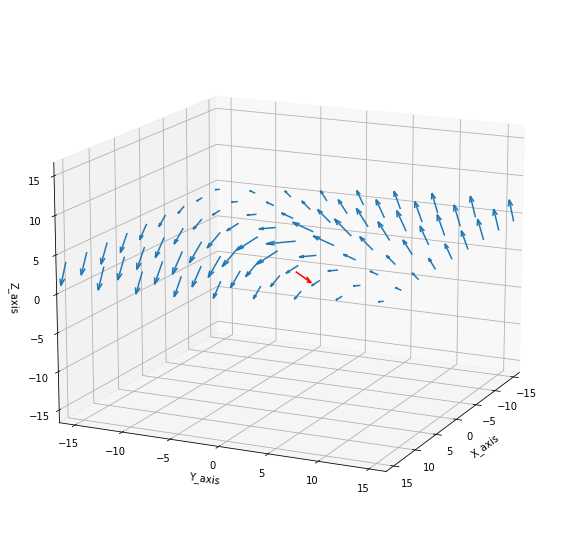

In [3]:
 # signal 벡터 및 각각의 sensor 위치에서 signal에 의해 유도되는 자기장의 단위 벡터 그래프
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

for i in range(n):
    for j in range(m):
        X, Y, Z = H_vec[i,j]
        ax.quiver(sensor_array[i,j][0],sensor_array[i,j][1],sensor_array[i,j][2],X, Y, Z, length=3)

ax.quiver(0,0,0,1,1,0,length=3, color='red')        
ax.set_xlim([-16, 16])
ax.set_ylim([-16, 16])
ax.set_zlim([-16, 16])
ax.set_xlabel('X_axis')
ax.set_ylabel('Y_axis')
ax.set_zlabel('Z_axis')
ax.view_init(15,25)
plt.show()

In [4]:
# I = signal or noise
#dH = I * H_vec[i,j,2] / (4 * math.pi * R[i,j]**2)

In [5]:
z = np.zeros((n,m), dtype = np.ndarray)
for i in range(n):
    for j in range(m):
        z[i,j]  = float(H_vec[i,j][2])/float(R[i,j])**2
z.shape

(9, 9)

In [6]:
np.linalg.norm(H_vec[0,8][2])

0.9847319278346619